In [7]:
import pandas as pd

In [8]:
pd.__version__

'1.0.1'

In [9]:
print(pd.__name__)

pandas


In [10]:
countries = pd.Series(
    data=['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Буларусь', 'Казахстан' ],
    index=['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ'],
    name='contries'
)
display(countries)

UK       Англия
CA       Канада
US          США
RU       Россия
UA      Украина
BY     Буларусь
KZ    Казахстан
Name: contries, dtype: object

In [11]:
countries = pd.Series({
    'UK':'Англия',
    'CA':'Канада',
    'US':'США',
    'RU':'Россия',
    'UA':'Украина',
    'BY':'Беларусь',
    'KZ':'Казахстан'}, name='countries')
display(countries)


UK       Англия
CA       Канада
US          США
RU       Россия
UA      Украина
BY     Беларусь
KZ    Казахстан
Name: countries, dtype: object

In [11]:
print(countries.loc['US'])

США


In [12]:
print(countries.loc[['UK', 'US', 'RU']])

UK    Англия
US       США
RU    Россия
Name: contries, dtype: object


In [17]:
print(countries.iloc[1:4])

CA    Канада
US       США
RU    Россия
Name: contries, dtype: object


In [6]:
import pandas as pd

def create_medications(names, counts):
    """
    Напишите функцию create_mediactions(names, counts), которая  создает Series medications,
    индексами которой являются названия лекарств names, а значениями - их количество в поставке counts
    """
    medications = pd.Series(index=names, data=counts)
    return medications
   

def get_percent(medications, name):
    """
    А также напишите функцию get_percent(medications, name), которая возвращает долю количества товара
    с именем name от общего количества товаров в поставке в процентах.
    """
    return(medications.loc[name]/sum(medications) * 100)

if __name__ == '__main__':
    names=['chlorhexidine', 'cyntomycin', 'afobazol']
    counts=[15, 18, 7]
    medications = create_medications(names, counts)
    print(get_percent(medications, "chlorhexidine")) #37.5
    


37.5


✍ Наиболее популярным и понятным является табличное представление данных. Для работы с такими данными в Pandas существует объект DataFrame.

DataFrame является двумерной структурой и представляется в виде таблицы, в которой есть строки и столбцы: столбцами в DataFrame выступают объекты Series, а строки формируются из их элементов. Также в DataFrame есть метки (индексы), которые соответствуют каждой строке таблицы.

Приведём пример такой структуры:

Примечание. В дальнейшем слова DataFrame и таблица будут употребляться как синонимы. Также синонимами в Data Science являются слова столбец таблицы и признак.

In [10]:
countries_df = pd.DataFrame({
    'country':['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population':[56.29, 38.05, 322.28, 14.24, 45.5, 9.5, 17.4],
    'square':[133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})
countries_df.index=['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
display(countries_df)

,country,population,square
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,14.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.40,2724902


Также DataFrame можно создать из вложенного списка, внутренние списки которого будут являться строками новой таблицы:

In [11]:
countries_df = pd.DataFrame(
    data = [
        ['Англия', 56.29, 133396],
        ['Канада', 38.05, 9984670],
        ['США', 322.28, 9826630],
        ['Россия', 146.24, 17125191],
        ['Украина', 45.5, 603628],
        ['Беларусь', 9.5, 207600],
        ['Казахстан', 17.04, 2724902]
    ],
    columns= ['country', 'population', 'square'],
    index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
)
display(countries_df)

,country,population,square
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,146.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.04,2724902


В данном варианте создания DataFrame мы задаём имена столбцов в списке с помощью параметра columns, а также инициализируем параметр index для задания меток стран.

AXIS В DATAFRAME

→ Как уже было сказано, DataFrame является двумерной структурой данных, что означает наличие двух возможных направлений движения в ней: вдоль строк и вдоль столбцов. 

Например, мы можем удалять как строки, так и столбцы таблицы, вычислять среднее значение как по столбцам, так и по строкам таблицы.

При работе с Pandas важно уметь указывать направление работы метода, который используется. Для этого вводится понятие axis (ось, координата). Движение по строкам в таблице обозначается axis с индексом 0, а движение по столбцам — axis с индексом 1.

Данный параметр заложен во все методы, которые могут работать в двух направлениях и по умолчанию в большинстве из них axis=0, то есть они выполняют операции со строками, если не задавать axis вручную.

Схема ниже демонстрирует направления axis в DataFrame:

Рассмотрим разницу в результатах работы методов в зависимости от параметра axis на примере использования метода DataFrame mean() — вычисление среднего по таблице.

In [12]:
countries_df.mean(axis=0)

population    9.070000e+01
square        5.800860e+06
dtype: float64

Считаем среднее по строкам (axis = 0) в каждом столбце:

In [13]:
countries_df.mean(axis=1)

UK      66726.145
CA    4992354.025
US    4913476.140
RU    8562668.620
UA     301836.750
BY     103804.750
KZ    1362459.520
dtype: float64

Считаем среднее по столбцам (axis = 1) в каждой строке:

Здесь среднее было рассчитано по числовым столбцам для каждой строки в таблице.

Доступ к столбцу можно получить разными способами:

Можно обратиться к DataFrame по имени столбца через точку:

In [14]:
countries_df.population

UK     56.29
CA     38.05
US    322.28
RU    146.24
UA     45.50
BY      9.50
KZ     17.04
Name: population, dtype: float64

Другой вариант — обратиться к DataFrame по индексу и указать имя столбца:

Однако использование такого способа возможно только тогда, когда имя столбца указано без пробелов.

In [16]:
countries_df['population']

UK     56.29
CA     38.05
US    322.28
RU    146.24
UA     45.50
BY      9.50
KZ     17.04
Name: population, dtype: float64

Примечание. Обратите внимание, что, как и ожидалось, при обращении к столбцу DataFrame мы получаем объект Series с именем, соответствующим имени столбца. Удостовериться в этом можно с помощью функции type():

type(countries_df.population)

**pandas.core.series.Series**

In [18]:
countries_df.iloc[2:4]

,country,population,square
US,США,322.28,9826630
RU,Россия,146.24,17125191


In [19]:
countries_df.loc['US', 'square']

9826630

In [20]:
countries_df.loc['RU',['population', 'square']]

population      146.24
square        17125191
Name: RU, dtype: object

In [22]:
countries_df.loc[['UA','BY', 'KZ'], ['population', 'square']]

,population,square
UA,45.50,603628
BY,9.50,207600
KZ,17.04,2724902


In [24]:
countries_df.iloc[4:8, 1:3]

,population,square
UA,45.50,603628
BY,9.50,207600
KZ,17.04,2724902


✍ Для нас DataFrame является главной структурой данных в Pandas, с которой мы будем работать на протяжении всех модулей, посвящённых этой библиотеке.

Далее мы рассмотрим ещё несколько способов создания этой структуры из различных источников, а пока предлагаем вам закрепить знания, выполнив несколько заданий ↓

In [2]:
import pandas as pd

def create_companyDF(income, expenses, years):
    """
    Создайте функцию create_companyDF(income, expenses, years), которая  возвращает DataFrame, 
    составленный из входных данных со столбцами “Income” и “Expenses” и индексами, соответствующим годам рассматриваемого периода.
    """
    df = pd.DataFrame({'Income':income, 'Expenses':expenses},index=years )
    return df

def get_profit(df, year):
    
    """
    А также напишите функцию get_profit(df, year), которая возвращает разницу между доходом и расходом, записанных в таблице df, за год year.
    Учтите, что если информация за запрашиваемый год не указана в вашей таблице вам необходимо вернуть None. 
    """
    #ваш код здесь
    if year in df.index:
        profit= df.loc[year, 'Income'] - df.loc[year, 'Expenses']
    else:
        profit = None
    return profit

if __name__ == '__main__':
    expenses = [156, 130, 270]
    income = [478, 512, 196]
    years = [2018, 2019, 2020]
    
    scienceyou = create_companyDF(income, expenses, years)
    print(get_profit(scienceyou, 2020)) #-74

-74


In [2]:
import numpy as np
import pandas as pd

countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'square': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})

countries_df.to_csv('data/countries.csv', index=False, sep=';')

In [3]:
countries_data = pd.read_csv('data/countries.csv', sep=';')
display(countries_data)

,country,population,square
0,Англия,56.29,133396
1,Канада,38.05,9984670
2,США,322.28,9826630
3,Россия,146.24,17125191
4,Украина,45.50,603628
5,Беларусь,9.50,207600
6,Казахстан,17.04,2724902


In [4]:
melb_data = pd.read_csv('data/melb_data.csv', sep=',')

In [21]:
melb_data.loc('Price')

ValueError: No axis named Price for object type <class 'pandas.core.frame.DataFrame'>

In [44]:
melb_data.loc[3521]['Landsize'] / melb_data.loc[1690]['Landsize']

2.7857142857142856

In [43]:
print(a, b)

234.0 84.0


In [45]:
display(melb_data.head())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [46]:
melb_data.tail(7)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,...,2.0,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,16166.0
13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,...,2.0,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [47]:
melb_data.shape

(13580, 21)

In [48]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [57]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [67]:
melb_data.describe().loc[:, ['Distance', 'BuildingArea', 'Price']]

,Distance,BuildingArea,Price
count,13580.000000,7130.000000,1.358000e+04
mean,10.137776,151.967650,1.075684e+06
std,5.868725,541.014538,6.393107e+05
min,0.000000,0.000000,8.500000e+04
25%,6.100000,93.000000,6.500000e+05
50%,9.200000,126.000000,9.030000e+05
75%,13.000000,174.000000,1.330000e+06
max,48.100000,44515.000000,9.000000e+06


In [68]:
melb_data.describe(include=['object'])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,14 Arthur St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [141]:
sum(melb_data['Type'].value_counts())

13580

In [83]:
melb_data['CouncilArea'].tail(140)

13440    NaN
13441    NaN
13442    NaN
13443    NaN
13444    NaN
        ... 
13575    NaN
13576    NaN
13577    NaN
13578    NaN
13579    NaN
Name: CouncilArea, Length: 140, dtype: object

In [89]:
melb_data['CouncilArea'].count()

12211

In [ ]:
melb_data.astype({'Car':'int64'}).dtypes

In [ ]:
melb_data.quantile(Price)

In [157]:
print(melb_data['Price'].mean())
print(melb_data['Car'].max())

1075684.079455081
10.0


Если один из этих методов применить ко всему DataFrame, то в результате его работы будет получен объект типа Series, в котором в качестве индексов будут выступать наименования столбцов, а в качестве значений — статистический показатель. В случае применения метода к отдельному столбцу результатом вычислений станет число.

В каждый метод можно передать некоторые параметры, среди которых:

axis  — определяет, подсчитывать параметр по строкам или по столбцам;
numeric_only — определяет, вычислять параметры только по числовым столбцам/строкам или нет (True/False).

МЕТОД	СТАТИСТИЧЕСКИЙ ПАРАМЕТР
**.count()**	Количество непустых значений
**.mean()**	Среднее значение
**.min()**	Минимальное значение
**.max()**	Максимальное значение
**.deviance()**	Дисперсия
**.std()**	Стандартное отклонение
**.sum()**	Сумма
**.quantile(x)**	Квантиль уровня x
**.nunique()**	Число уникальных значений

А теперь представим, что риэлторская ставка для всех компаний за продажу недвижимости составляет 12%. Найдём общую прибыльность риэлторского бизнеса в Мельбурне. Результат округлим до сотых:

In [158]:
rate = 0.12
income = melb_data['Price'].sum() * rate
print('Total income of real estate agencies: ', round(income, 2))

Total income of real estate agencies:  1752934775.88


Найдём, насколько медианная площадь территории отличается от её среднего значения. Вычислим модуль разницы между медианой и средним и разделим результат на среднее, чтобы получить отклонение в долях:

In [159]:
landsize_median = melb_data['Landsize'].median() 
landsize_mean =  melb_data['Landsize'].mean()
print(abs(landsize_median - landsize_mean)/landsize_mean)


0.21205713983546193


В результате получаем долю отклонения медианы от среднего значения. Умножив результат на 100, получим его в процентах. Отклонение медианы от среднего значения на 21% является довольно большим, и это повод задуматься над тем, чтобы исследовать признак на наличие аномалий. 

МОДАЛЬНОЕ ЗНАЧЕНИЕ

→ Отдельный интерес представляет статический показатель моды — самого распространённого значения в столбце. Он вычисляется с помощью метода mode().

Модальных значений может быть несколько, то есть несколько значений могут встречаться одинаковое количество раз. Поэтому метод mode(), в отличие от агрегирующих методов, возвращает не одно число, а серию.

Вычислим, какое число комнат чаще всего представлено на рынке недвижимости:

In [160]:
melb_data['Regionname'].mode()

0    Southern Metropolitan
dtype: object

In [161]:
melb_data['Landsize'].std()

3990.6692411090344

In [162]:
melb_data['Price'].std()

639310.7242960194

In [164]:
melb_data['Propertycount'].max()

21650.0

In [165]:
melb_data['Distance'].std()

5.868724943071692

In [176]:
a = melb_data['Landsize'].median() 
b = melb_data['Landsize'].std()
print(a, '\n')
print(b)


440.0 

3990.6692411090344


In [177]:
a = pd.Series([1, 2, 4, 2, 3, 2, 1, 5, 6])



In [179]:
a.mode()

0    2
dtype: int64

In [180]:
mask = melb_data['Price'] > 2000000

In [181]:
mask

0        False
1        False
2        False
3        False
4        False
         ...  
13575    False
13576    False
13577    False
13578     True
13579    False
Name: Price, Length: 13580, dtype: bool

In [ ]:
melb_data = melb_data.astype('int64')
melb_data.info()

mask = melb_data['Rooms']
display(mask)

In [199]:
display(melb_data[mask].head(20))

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
20,Abbotsford,3/72 Charles St,4,h,1330000.0,PI,Kay,18/03/2017,2.5,3067.0,...,2.0,2,780.0,135.0,1900.0,Yarra,-37.8073,144.9952,Northern Metropolitan,4019.0
30,Abbotsford,31 Turner St,4,h,1542000.0,S,Collins,24/09/2016,2.5,3067.0,...,3.0,1,0.0,0.0,0.0,Yarra,-37.7994,144.9965,Northern Metropolitan,4019.0
46,Airport West,36 Roberts Rd,4,h,785000.0,S,Considine,6/08/2016,13.5,3042.0,...,1.0,2,597.0,127.0,0.0,Moonee Valley,-37.7259,144.8792,Western Metropolitan,3464.0
47,Airport West,11 Harrington Rd,6,h,725000.0,SP,Barry,7/05/2016,13.5,3042.0,...,3.0,2,976.0,186.0,1980.0,Moonee Valley,-37.7239,144.8735,Western Metropolitan,3464.0
55,Airport West,241 Parer Rd,5,h,755000.0,PI,Propertyau,14/05/2016,13.5,3042.0,...,2.0,2,596.0,0.0,0.0,Moonee Valley,-37.7248,144.8699,Western Metropolitan,3464.0
63,Airport West,6 Kittyhawk St,4,h,773000.0,S,Brad,17/09/2016,13.5,3042.0,...,3.0,4,531.0,309.0,1980.0,Moonee Valley,-37.7263,144.8679,Western Metropolitan,3464.0
74,Airport West,34 Moorna Dr,4,h,978000.0,S,Nelson,24/09/2016,13.5,3042.0,...,3.0,2,532.0,0.0,0.0,Moonee Valley,-37.7263,144.8690,Western Metropolitan,3464.0
76,Airport West,49 Roberts Rd,4,h,765000.0,S,Prof.,27/11/2016,13.5,3042.0,...,1.0,2,509.0,0.0,0.0,Moonee Valley,-37.7261,144.8785,Western Metropolitan,3464.0
77,Airport West,85 Roberts Rd,4,h,900000.0,S,Harcourts,27/11/2016,13.5,3042.0,...,2.0,3,628.0,146.0,1975.0,Moonee Valley,-37.7256,144.8739,Western Metropolitan,3464.0


Примечание. В результате выполнения фильтрации возвращается новый DataFrame, полученный из исходного, при этом исходная таблица melb_data остаётся без изменений.

Также вовсе не обязательно заносить маску в отдельную переменную — можно сразу вставлять условие в операцию индексации DataFrame, например:

melb_data[melb_data['Price'] > 2000000]
Найдём количество зданий с тремя комнатами. Для этого отфильтруем таблицу по условию: обратимся к результирующей таблице по столбцу Rooms и найдём число строк в ней с помощью атрибута shape:

In [222]:
melb_data[(melb_data['Rooms'] == 3) & (melb_data['Price'] < 1600000) & (melb_data['Type'] == 't')].shape[0]

585

Примечание. Обратите внимание, что использование привычных операторов and и or будет неверным и приведёт к ошибке, так как они выполняют логические операции между двумя булевыми числами. В нашем случае слева и справа от оператора стоят маски (объекты Series), для которых логическую операцию надо совершить поэлементно, а операторы and и or для такого не предназначены.

Фильтрацию часто сочетают со статистическими методами. Давайте найдём максимальное количество комнат в таунхаусах. Так как в результате фильтрации получается DataFrame, то обратимся к нему по столбцу Rooms и найдём максимальное значение:

In [225]:
melb_data[melb_data['Bathroom'] == 0].shape[0]

34

In [ ]:
melb_data[(melb_data['Rooms'] > 5) & (melb_data['Price'] < 1000000) | (melb_data['YearBuilt'] < 2015)].mean().head()


In [350]:
melb_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13580 non-null  int64  
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  int64  
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [351]:
melb_data[(melb_data['Price']<1e6) & ((melb_data['Rooms']>5) | (melb_data['YearBuilt']>2015))]['Price'].mean()

769238.6363636364

In [356]:
melb_data[(melb_data['BuildingArea'] == 0)]['Price'].min()

85000.0

In [353]:
melb_data[(melb_data['Type'] == 'h') & (melb_data['Price'] < 3000000)]['Regionname'].mode()

0    Northern Metropolitan
dtype: object

In [354]:
melb_data[(melb_data['SellerG'] == 'Nelson') & (melb_data['Price'] > 3e6)].shape[0]

5

In [61]:
student_data = pd.read_csv('data/students_performance.csv', sep=',')

In [62]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [361]:
student_data.shape


(1000, 8)

In [364]:
student_data['race/ethnicity'].describe(include='object')

count        1000
unique          5
top       group C
freq          319
Name: race/ethnicity, dtype: object

In [365]:
student_data['gender'].describe()

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

In [366]:
student_data.loc[155]['writing score']

88

In [367]:
student_data.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [60]:
student_data.info()

NameError: name 'student_data' is not defined

In [369]:
student_data['math score'].mean()

66.089

Каков средний балл по чтению у студентов, которые посещали курсы подготовки к экзаменам?

test preparation course — посещал ли студент курсы подготовки к экзаменам (none — не посещал, completed — посещал);

math score, reading score, writing score — баллы по математике, чтению и письму по сто балльной шкале.

In [392]:
round(student_data[student_data['test preparation course']=='completed']['reading score'].mean())

74

In [375]:
display(mask_reading)

69.169

Сколько студентов получили 0 баллов по математике?

In [397]:
student_data[(student_data['math score']==0)].shape[0]

1

Проверьте гипотезу: у студентов с оплачиваемым питанием средний балл по математике выше, чем у студентов с льготным питанием.
В качестве ответа напишите наибольший средний балл по математике среди этих групп студентов.

lunch — какие обеды получал студент во время обучения (standard — платный, free/reduced — бесплатный);

In [409]:
student_data[(student_data['lunch'] == 'standart']['ma']

TypeError: Cannot perform 'and_' with a dtyped [bool] array and scalar of type [bool]

In [3]:
import pandas as pd
df = pd.read_csv('data/IHME-GBD_2019_DATA.csv',delimiter=',', encoding='utf-8')
df.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases,Rate,2000,64.470214,81.808307,53.476793
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases,Rate,2000,55.234399,77.883497,39.978647
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases,Rate,2000,60.039961,76.013089,49.941986
3,Deaths,Samoa,Male,All Ages,Skin and subcutaneous diseases,Rate,2000,2.246741,3.467454,1.438979
4,Deaths,Samoa,Female,All Ages,Skin and subcutaneous diseases,Rate,2000,1.368385,1.945448,0.866099


In [4]:
df['val'].mean()

38.800590204586626

In [413]:
df['cause'].count()

257040

In [414]:
df['cause'].unique()

array(['Chronic respiratory diseases', 'Skin and subcutaneous diseases',
       'Transport injuries', 'Unintentional injuries',
       'Musculoskeletal disorders', 'Other non-communicable diseases',
       'HIV/AIDS and sexually transmitted infections',
       'Respiratory infections and tuberculosis', 'Enteric infections',
       'Other infectious diseases', 'Maternal and neonatal disorders',
       'Substance use disorders', 'Nutritional deficiencies', 'Neoplasms',
       'Neurological disorders', 'Mental disorders',
       'Self-harm and interpersonal violence', 'Digestive diseases',
       'Neglected tropical diseases and malaria',
       'Cardiovascular diseases', 'Diabetes and kidney diseases'],
      dtype=object)

In [415]:
df['cause'].value_counts()

Substance use disorders                         12240
Neglected tropical diseases and malaria         12240
Musculoskeletal disorders                       12240
Digestive diseases                              12240
Other non-communicable diseases                 12240
Nutritional deficiencies                        12240
HIV/AIDS and sexually transmitted infections    12240
Mental disorders                                12240
Other infectious diseases                       12240
Neurological disorders                          12240
Enteric infections                              12240
Cardiovascular diseases                         12240
Unintentional injuries                          12240
Skin and subcutaneous diseases                  12240
Transport injuries                              12240
Neoplasms                                       12240
Respiratory infections and tuberculosis         12240
Diabetes and kidney diseases                    12240
Self-harm and interpersonal 

In [416]:
df.sort_values(['val'], ascending= False)

,measure,location,sex,age,cause,metric,year,val,upper,lower
85701,Deaths,Haiti,Male,All Ages,Unintentional injuries,Rate,2010,2754.279032,3029.881582,2511.135907
85703,Deaths,Haiti,Both,All Ages,Unintentional injuries,Rate,2010,2199.133930,2416.170674,2003.802176
85702,Deaths,Haiti,Female,All Ages,Unintentional injuries,Rate,2010,1677.044385,1845.673574,1524.945269
224318,Deaths,Bulgaria,Female,All Ages,Cardiovascular diseases,Rate,2019,1177.059351,1389.915309,990.814152
207155,Deaths,Bulgaria,Female,All Ages,Cardiovascular diseases,Rate,2018,1154.803495,1334.438294,987.855957
...,...,...,...,...,...,...,...,...,...,...
184240,Deaths,Slovenia,Male,All Ages,Mental disorders,Rate,2018,0.000007,0.000011,0.000005
195775,Deaths,Slovenia,Male,All Ages,Mental disorders,Rate,2015,0.000007,0.000010,0.000006
130513,Deaths,Slovenia,Male,All Ages,Mental disorders,Rate,2014,0.000007,0.000010,0.000005
180343,Deaths,Slovenia,Male,All Ages,Mental disorders,Rate,2016,0.000007,0.000010,0.000005


In [419]:
df.nlargest(5, 'val')

,measure,location,sex,age,cause,metric,year,val,upper,lower
85701,Deaths,Haiti,Male,All Ages,Unintentional injuries,Rate,2010,2754.279032,3029.881582,2511.135907
85703,Deaths,Haiti,Both,All Ages,Unintentional injuries,Rate,2010,2199.133930,2416.170674,2003.802176
85702,Deaths,Haiti,Female,All Ages,Unintentional injuries,Rate,2010,1677.044385,1845.673574,1524.945269
224318,Deaths,Bulgaria,Female,All Ages,Cardiovascular diseases,Rate,2019,1177.059351,1389.915309,990.814152
207155,Deaths,Bulgaria,Female,All Ages,Cardiovascular diseases,Rate,2018,1154.803495,1334.438294,987.855957


In [421]:
df[df['year'] == 2019].nlargest(5, 'val')

,measure,location,sex,age,cause,metric,year,val,upper,lower
224318,Deaths,Bulgaria,Female,All Ages,Cardiovascular diseases,Rate,2019,1177.059351,1389.915309,990.814152
224319,Deaths,Bulgaria,Both,All Ages,Cardiovascular diseases,Rate,2019,1140.933052,1349.387220,960.194209
224317,Deaths,Bulgaria,Male,All Ages,Cardiovascular diseases,Rate,2019,1102.642773,1312.249719,922.635865
207635,Deaths,Ukraine,Female,All Ages,Cardiovascular diseases,Rate,2019,1035.300219,1223.150810,858.748304
207636,Deaths,Ukraine,Both,All Ages,Cardiovascular diseases,Rate,2019,1020.326176,1166.207717,890.091470


In [424]:
df[df['location'].isin(['Russian Federation', 'Belarus']) & (df['year'] == 2019)].nlargest(15, 'val')

,measure,location,sex,age,cause,metric,year,val,upper,lower
232799,Deaths,Belarus,Female,All Ages,Cardiovascular diseases,Rate,2019,836.419757,1023.558506,690.070306
232800,Deaths,Belarus,Both,All Ages,Cardiovascular diseases,Rate,2019,792.975384,977.913501,654.436226
232798,Deaths,Belarus,Male,All Ages,Cardiovascular diseases,Rate,2019,743.207898,920.543570,598.798477
203891,Deaths,Russian Federation,Female,All Ages,Cardiovascular diseases,Rate,2019,729.037558,839.617823,609.431190
203892,Deaths,Russian Federation,Both,All Ages,Cardiovascular diseases,Rate,2019,684.943411,768.021861,599.861565
203890,Deaths,Russian Federation,Male,All Ages,Cardiovascular diseases,Rate,2019,634.333467,748.021386,527.282071
201745,Deaths,Belarus,Male,All Ages,Neoplasms,Rate,2019,255.537859,326.660406,202.534767
232951,Deaths,Russian Federation,Male,All Ages,Neoplasms,Rate,2019,227.873435,271.943282,187.846639
201747,Deaths,Belarus,Both,All Ages,Neoplasms,Rate,2019,207.014699,262.148921,166.132463
232953,Deaths,Russian Federation,Both,All Ages,Neoplasms,Rate,2019,202.308958,230.570053,177.719721


In [425]:
df.nsmallest(5, 'val')

,measure,location,sex,age,cause,metric,year,val,upper,lower
172120,Deaths,Slovenia,Male,All Ages,Mental disorders,Rate,2017,0.000007,0.000010,0.000005
180343,Deaths,Slovenia,Male,All Ages,Mental disorders,Rate,2016,0.000007,0.000010,0.000005
130513,Deaths,Slovenia,Male,All Ages,Mental disorders,Rate,2014,0.000007,0.000010,0.000005
195775,Deaths,Slovenia,Male,All Ages,Mental disorders,Rate,2015,0.000007,0.000010,0.000006
184240,Deaths,Slovenia,Male,All Ages,Mental disorders,Rate,2018,0.000007,0.000011,0.000005


In [429]:
df.groupby('cause').agg('min')

,measure,location,sex,age,metric,year,val,upper,lower
cause,,,,,,,,,
Cardiovascular diseases,Deaths,Afghanistan,Both,All Ages,Rate,2000,35.021965,43.903537,27.368661
Chronic respiratory diseases,Deaths,Afghanistan,Both,All Ages,Rate,2000,2.012826,2.844188,1.526347
Diabetes and kidney diseases,Deaths,Afghanistan,Both,All Ages,Rate,2000,8.253141,8.901900,7.168274
Digestive diseases,Deaths,Afghanistan,Both,All Ages,Rate,2000,3.569043,4.293794,2.621040
Enteric infections,Deaths,Afghanistan,Both,All Ages,Rate,2000,0.096702,0.119401,0.055745
HIV/AIDS and sexually transmitted infections,Deaths,Afghanistan,Both,All Ages,Rate,2000,0.038053,0.041294,0.034955
Maternal and neonatal disorders,Deaths,Afghanistan,Both,All Ages,Rate,2000,0.389833,0.440859,0.293011
Mental disorders,Deaths,Afghanistan,Both,All Ages,Rate,2000,0.000007,0.000010,0.000004
Musculoskeletal disorders,Deaths,Afghanistan,Both,All Ages,Rate,2000,0.077198,0.091866,0.056057


In [432]:
df_cause = df.groupby('cause').agg({'year': ['count'],
                         'val': ['mean', 'median']})

In [433]:
df_cause['val']['mean'].sort_values(ascending=False)

cause
Cardiovascular diseases                         244.849189
Neoplasms                                       127.104386
Respiratory infections and tuberculosis          63.475924
Diabetes and kidney diseases                     47.226334
HIV/AIDS and sexually transmitted infections     41.961014
Maternal and neonatal disorders                  37.557121
Digestive diseases                               34.127663
Chronic respiratory diseases                     31.818755
Enteric infections                               27.374869
Neurological disorders                           25.430591
Unintentional injuries                           24.371415
Self-harm and interpersonal violence             21.545159
Neglected tropical diseases and malaria          19.971543
Other non-communicable diseases                  19.209209
Transport injuries                               18.432300
Other infectious diseases                        16.805678
Nutritional deficiencies                          

Различие смертности по половому признаку

In [5]:
df_gender = df.groupby(['cause', 'sex']).agg({'val':['mean', 'median']})

In [6]:
df_gender

val            
                                           mean      median
cause                        sex                           
Cardiovascular diseases      Both    245.038277  199.178194
                             Female  242.429336  181.537109
                             Male    247.079954  204.731125
Chronic respiratory diseases Both     31.783867   27.341307
                             Female   27.003046   21.051406
...                                         ...         ...
Transport injuries           Female    9.329241    7.783497
                             Male     27.497411   25.001762
Unintentional injuries       Both     24.338395   21.899341
                             Female   16.590452   14.334211
                             Male     32.185398   28.135601

[63 rows x 2 columns]

In [9]:
df_gender.xs('Transport injuries', level = 'cause')

val           
             mean     median
sex                         
Both    18.470248  16.414021
Female   9.329241   7.783497
Male    27.497411  25.001762

In [10]:
df_gender.xs('Transport injuries', level='cause')['val'].loc['Male', 'median']

25.00176213580758

In [11]:
df_pivot = df.pivot_table(values='val', index='location', columns='cause', aggfunc='mean',
                          margins=True, dropna=True, fill_value=None)

In [12]:
df_pivot

cause,Cardiovascular diseases,Chronic respiratory diseases,Diabetes and kidney diseases,Digestive diseases,Enteric infections,HIV/AIDS and sexually transmitted infections,Maternal and neonatal disorders,Mental disorders,Musculoskeletal disorders,Neglected tropical diseases and malaria,...,Nutritional deficiencies,Other infectious diseases,Other non-communicable diseases,Respiratory infections and tuberculosis,Self-harm and interpersonal violence,Skin and subcutaneous diseases,Substance use disorders,Transport injuries,Unintentional injuries,All
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,202.375232,26.283434,29.889561,23.648013,34.692006,1.747194,104.557463,0.000117,0.428224,2.870045,...,8.352238,81.390420,77.105343,114.130096,54.947067,0.224540,1.415591,27.812526,36.817762,42.873049
Albania,350.065948,23.643664,14.303989,15.771775,0.322375,0.194891,12.381025,0.000254,0.882867,0.441547,...,0.245254,2.916988,10.478484,17.141204,9.008431,0.131889,1.431452,10.079187,12.260342,30.715525
Algeria,211.215757,16.638977,25.538174,14.408948,2.679954,1.122914,35.924183,0.000364,0.460576,0.274764,...,0.463404,4.152343,23.238323,16.881028,7.531135,0.206116,1.401982,33.912620,15.953376,22.571417
American Samoa,182.311074,37.029051,101.290061,20.895993,5.532732,3.695134,13.013514,0.000230,1.019103,0.764889,...,3.421502,6.310314,20.761220,20.485182,12.420796,5.103073,1.314551,9.995268,26.935055,27.933123
Andorra,174.338254,40.992289,24.870302,27.486543,0.839889,4.129317,0.881686,0.015542,0.677423,0.007684,...,0.219971,2.305836,9.399009,20.469876,10.417052,0.414201,1.898603,11.814318,23.117712,30.649792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,223.841941,36.347300,39.253687,27.870909,5.289481,7.903427,13.434759,0.002083,0.620941,0.889066,...,1.508684,8.133922,9.090796,49.437088,9.710640,1.004259,1.723580,26.709616,26.539280,28.688687
Yemen,165.911423,18.345432,12.766880,16.493159,51.011000,2.593223,107.245021,0.000081,0.258147,18.424556,...,7.405685,21.321036,43.682675,35.790119,23.252472,0.127100,0.850062,41.413148,21.783340,30.127886
Zambia,99.046369,15.704447,26.426040,39.916515,87.554530,340.781886,87.096133,0.001162,0.492557,49.499458,...,21.998498,46.569795,29.201699,151.119300,16.987191,0.756043,1.018064,17.048690,21.226408,53.053798


In [13]:
df_pivot.loc['Russian Federation', 'HIV/AIDS and sexually transmitted infections']

10.398426720211068

In [18]:
df_pivot = df.pivot_table(values='val', index=['location', 'year'], columns='cause', aggfunc='mean',
                          margins=False, dropna=True, fill_value=None)

In [19]:
df_pivot

cause             Cardiovascular diseases  Chronic respiratory diseases  \
location    year                                                          
Afghanistan 2000               277.109664                     38.385429   
            2001               270.029783                     37.377335   
            2002               252.180498                     34.664673   
            2003               241.168954                     33.187209   
            2004               232.339986                     31.901705   
...                                   ...                           ...   
Zimbabwe    2015               117.990038                     19.588002   
            2016               118.113140                     19.538563   
            2017               117.962337                     19.438449   
            2018               117.954792                     19.341164   
            2019               118.421713                     19.316559   

cause             Diabetes and kidney diseases  Digestive diseases  \
location    year                                                     
Afghanistan 2000                     34.652071           31.889536   
            2001                     34.406000           31.017839   
            2002                     32.776473           29.047243   
            2003                     32.322345           28.624092   
            2004                     31.924916           27.908725   
...                                        ...                 ...   
Zimbabwe    2015                     37.501942           30.124500   
            2016                     37.842183           30.085882   
            2017                     37.857616           30.154461   
            2018                     38.015905           29.920500   
            2019                     38.289029           29.860794   

cause             Enteric infections  \
location    year                       
Afghanistan 2000           61.691958   
            2001           60.038957   
            2002           56.370484   
            2003           58.737912   
            2004           56.373143   
...                              ...   
Zimbabwe    2015           37.981564   
            2016           36.739620   
            2017           35.798735   
            2018           33.836991   
            2019           32.561184   

cause             HIV/AIDS and sexually transmitted infections  \
location    year                                                 
Afghanistan 2000                                      1.921742   
            2001                                      1.834323   
            2002                                      1.799447   
            2003                                      1.823566   
            2004                                      1.772634   
...                                                        ...   
Zimbabwe    2015                                    209.638821   
            2016                                    192.186381   
            2017                                    173.349995   
            2018                                    152.130230   
            2019                                    140.640012   

cause             Maternal and neonatal disorders  Mental disorders  \
location    year                                                      
Afghanistan 2000                       139.819772          0.000085   
            2001                       136.772919          0.000085   
            2002                       132.530948          0.000081   
            2003                       130.407014          0.000085   
            2004                       126.309335          0.000090   
...                                           ...               ...   
Zimbabwe    2015                        75.614249          0.001632   
            2016                        72.783624          0.001705   
            2017       

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Смертность от ВИЧ в России')

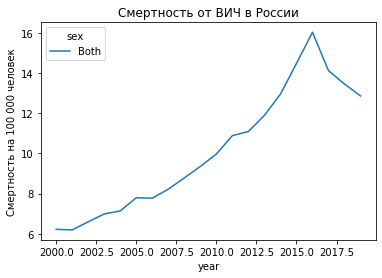

In [22]:
df[(df['location'] == 'Russian Federation') & (df['cause'] == 'HIV/AIDS and sexually transmitted infections') &
   (df['sex'] == 'Both')].pivot_table(values='val', index='year',columns='sex', aggfunc='mean',
                                      fill_value=None, margins=False, dropna=True).plot(kind='line')
plt.ylabel('Смертность на 100 000 человек')
plt.title('Смертность от ВИЧ в России')

Text(0.5, 1.0, 'Смертность от ВИЧ в России')

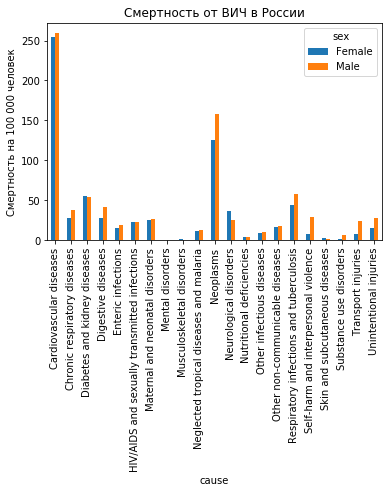

In [23]:
df_bar = df[(df['sex'].isin(['Male', 'Female'])) &(df['year'] == 2019)].pivot_table(values='val', 
                                      index='cause',columns='sex', aggfunc='mean',
                                      fill_value=None, margins=False, dropna=True)
df_bar.plot(kind = 'bar')
plt.ylabel('Смертность на 100 000 человек')
plt.title('Смертность от ВИЧ в России')

In [44]:
df1 = pd.read_csv('data/IHME-GBD_2019_DATA-1.csv', delimiter=',', encoding='utf-8')
df2 = pd.read_csv('data/IHME-GBD_2019_DATA.csv', delimiter=',', encoding='utf-8')

In [46]:
df2.head(10)
df1.head(10)

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases,Rate,2000,64.470214,81.808307,53.476793
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases,Rate,2000,55.234399,77.883497,39.978647
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases,Rate,2000,60.039961,76.013089,49.941986
3,Deaths,Samoa,Male,All Ages,Skin and subcutaneous diseases,Rate,2000,2.246741,3.467454,1.438979
4,Deaths,Samoa,Female,All Ages,Skin and subcutaneous diseases,Rate,2000,1.368385,1.945448,0.866099
5,Deaths,Samoa,Both,All Ages,Skin and subcutaneous diseases,Rate,2000,1.825409,2.569260,1.259226
6,Deaths,Samoa,Male,All Ages,Transport injuries,Rate,2000,25.920294,36.084587,18.130636
7,Deaths,Samoa,Female,All Ages,Transport injuries,Rate,2000,10.099048,13.447738,7.330908
8,Deaths,Samoa,Both,All Ages,Transport injuries,Rate,2000,18.331128,25.000813,13.148053
9,Deaths,Samoa,Male,All Ages,Unintentional injuries,Rate,2000,28.989384,39.579940,20.833239


In [47]:
df1.rename(columns={'val':'daly_val', 'upper':'daly_upper', 'lower':'daly_lower'}, inplace=True)

In [48]:
df1

,measure,location,sex,age,cause,metric,year,daly_val,daly_upper,daly_lower
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases,Rate,2000,64.470214,81.808307,53.476793
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases,Rate,2000,55.234399,77.883497,39.978647
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases,Rate,2000,60.039961,76.013089,49.941986
3,Deaths,Samoa,Male,All Ages,Skin and subcutaneous diseases,Rate,2000,2.246741,3.467454,1.438979
4,Deaths,Samoa,Female,All Ages,Skin and subcutaneous diseases,Rate,2000,1.368385,1.945448,0.866099
...,...,...,...,...,...,...,...,...,...,...
257035,Deaths,Comoros,Female,All Ages,Neglected tropical diseases and malaria,Rate,2004,53.727176,92.205694,24.130322
257036,Deaths,Comoros,Both,All Ages,Neglected tropical diseases and malaria,Rate,2004,55.473969,96.573472,24.780106
257037,Deaths,Comoros,Male,All Ages,Chronic respiratory diseases,Rate,2004,26.083547,32.912324,18.654426
257038,Deaths,Comoros,Female,All Ages,Chronic respiratory diseases,Rate,2004,19.658170,25.456633,14.278054


In [49]:
df2.rename(columns={'val': 'Deaths_val',
                    'upper': 'Deaths_upper',
                    'lower': 'Deaths_lower'}, inplace=True)

In [50]:
df2

,measure,location,sex,age,cause,metric,year,Deaths_val,Deaths_upper,Deaths_lower
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases,Rate,2000,64.470214,81.808307,53.476793
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases,Rate,2000,55.234399,77.883497,39.978647
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases,Rate,2000,60.039961,76.013089,49.941986
3,Deaths,Samoa,Male,All Ages,Skin and subcutaneous diseases,Rate,2000,2.246741,3.467454,1.438979
4,Deaths,Samoa,Female,All Ages,Skin and subcutaneous diseases,Rate,2000,1.368385,1.945448,0.866099
...,...,...,...,...,...,...,...,...,...,...
257035,Deaths,Comoros,Female,All Ages,Neglected tropical diseases and malaria,Rate,2004,53.727176,92.205694,24.130322
257036,Deaths,Comoros,Both,All Ages,Neglected tropical diseases and malaria,Rate,2004,55.473969,96.573472,24.780106
257037,Deaths,Comoros,Male,All Ages,Chronic respiratory diseases,Rate,2004,26.083547,32.912324,18.654426
257038,Deaths,Comoros,Female,All Ages,Chronic respiratory diseases,Rate,2004,19.658170,25.456633,14.278054


In [52]:
df_all = pd.merge(df1, df2, on = ['location', 'sex', 'age', 'cause', 'metric', 'year'], how='inner')

In [54]:
df_all.head()

,measure_x,location,sex,age,cause,metric,year,daly_val,daly_upper,daly_lower,measure_y,Deaths_val,Deaths_upper,Deaths_lower
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases,Rate,2000,64.470214,81.808307,53.476793,Deaths,64.470214,81.808307,53.476793
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases,Rate,2000,55.234399,77.883497,39.978647,Deaths,55.234399,77.883497,39.978647
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases,Rate,2000,60.039961,76.013089,49.941986,Deaths,60.039961,76.013089,49.941986
3,Deaths,Samoa,Male,All Ages,Skin and subcutaneous diseases,Rate,2000,2.246741,3.467454,1.438979,Deaths,2.246741,3.467454,1.438979
4,Deaths,Samoa,Female,All Ages,Skin and subcutaneous diseases,Rate,2000,1.368385,1.945448,0.866099,Deaths,1.368385,1.945448,0.866099


In [55]:
df_all.shape

(257040, 14)

In [56]:
 df_all['Deaths_val_rond'] = df_all['Deaths_val'].round(decimals=1)
 df_all.head()

,measure_x,location,sex,age,cause,metric,year,daly_val,daly_upper,daly_lower,measure_y,Deaths_val,Deaths_upper,Deaths_lower,Deaths_val_rond
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases,Rate,2000,64.470214,81.808307,53.476793,Deaths,64.470214,81.808307,53.476793,64.5
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases,Rate,2000,55.234399,77.883497,39.978647,Deaths,55.234399,77.883497,39.978647,55.2
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases,Rate,2000,60.039961,76.013089,49.941986,Deaths,60.039961,76.013089,49.941986,60.0
3,Deaths,Samoa,Male,All Ages,Skin and subcutaneous diseases,Rate,2000,2.246741,3.467454,1.438979,Deaths,2.246741,3.467454,1.438979,2.2
4,Deaths,Samoa,Female,All Ages,Skin and subcutaneous diseases,Rate,2000,1.368385,1.945448,0.866099,Deaths,1.368385,1.945448,0.866099,1.4


In [63]:
  df_all.to_csv('Deaths_Daly_data.csv')

ЗАДАНИЕ 9.11

In [69]:
student_data["parental level of education"].value_counts(normalize=True)

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64

ЗАДАНИЕ 9.12

In [65]:
a = student_data[student_data['race/ethnicity'] == 'group A']['writing score'].median()
b = student_data[student_data['race/ethnicity'] == 'group C']['writing score'].mean()
print(round(abs(a - b)))


6
